# Health Survey Data Analysis
Olalekan Hammed


## Executive Summary
- Injest the data
- Prepare data
- Calculate 95% confidence interval for PHYSHLTH Mean
- Describe Difference in PHYSHLTH Based on RENTHOM1
- Perform t-Test on PHYSHLTH Based on RENTHOM1

## The Data

- This project uses health data from the CDC Behavioral Risk Factor Surveillance System (BRFSS). 
- Specifically this subset of the data represents survey responses from the 2020-2021 survey in the state of New York. 
- Each record represents a survey response.
- PHYSHLTH column is asking about "how many days during the past 30 days", you might assume that the values in this column will all be numbers between 0 and 30.
- RENTHOM1 is the binary option of whether the resident rents or owns home

In [23]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as stats

file_path = "https://raw.githubusercontent.com/learn-co-curriculum/da-phase3-project-enterprise/main/brfss_ny.csv"
df = pd.read_csv(file_path)
df.head()

,_STATE,FMONTH,IDATE,IMONTH,IDAY,IYEAR,DISPCODE,SEQNO,_PSU,CTELENM1,...,_RFPSA23,_CLNSCPY,_SGMSCPY,_SGMS10Y,_RFBLDS4,_STOLDNA,_VIRCOLN,_SBONTIM,_CRCREC1,_AIDTST4
0,36,11,11172020,11,17,2020,1200,2020000001,2020000001,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
1,36,1,1182020,1,18,2020,1200,2020000002,2020000002,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0
2,36,4,5042020,5,4,2020,1200,2020000003,2020000003,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0
3,36,1,1222020,1,22,2020,1200,2020000004,2020000004,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0
4,36,3,3102020,3,10,2020,1200,2020000005,2020000005,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0


## Data Preparation
- Extract PHYSHLTH & RENTHOM1 into a dafa frame
- Get unique values for PHYSHLTH & RENTHOM1
- Drop records with values of RENTHOM1 other than 1 or 2
- Dropping records with 77, 99 in PHYSHLTH column
- Converting all instances of 88 to 0

In [24]:
# Extract PHYSHLTH & RENTHOM1 into a dafa frame
df_phrh = df[['PHYSHLTH','RENTHOM1']]
df_phrh.head()

,PHYSHLTH,RENTHOM1
0,88.0,2.0
1,14.0,1.0
2,88.0,2.0
3,5.0,3.0
4,88.0,2.0


In [25]:
#get unique values for PHYSHLTH & RENTHOM1
print("PHYSHLTH unique values")
print(df_phrh.PHYSHLTH.unique())
print("RENTHOM1 unique values")
print(df_phrh.RENTHOM1.unique())

PHYSHLTH unique values
[88. 14.  5.  2.  3. 10. 30. 99. 20.  1.  7. 15. 77. 25.  8.  4. 21.  6.
 29.  9. 28. 18. 24. 17. 12. 13. 16. 26. 27. 23. 19. 11. 22.]
RENTHOM1 unique values
[2. 1. 3. 9. 7.]


In [26]:
#dropping records with values of RENTHOM1 other than 1 or 2.
df_phrh.drop(df_phrh.index[df_phrh['RENTHOM1'] > 2], inplace=True)
print(df_phrh)

       PHYSHLTH  RENTHOM1
0          88.0       2.0
1          14.0       1.0
2          88.0       2.0
4          88.0       2.0
5           2.0       2.0
...         ...       ...
14763      88.0       2.0
14764      88.0       2.0
14765      88.0       2.0
14766       2.0       2.0
14767      88.0       2.0

[13957 rows x 2 columns]


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [27]:
#check RENTHOM1 unique values
print(df_phrh.RENTHOM1.unique())

[2. 1.]


In [28]:
# Dropping records with 77, 99 in PHYSHLTH column
df_phrh.drop(df_phrh.index[(df_phrh['PHYSHLTH'] == 77 ) | (df_phrh['PHYSHLTH'] == 99)], inplace=True)
print(df_phrh)

       PHYSHLTH  RENTHOM1
0          88.0       2.0
1          14.0       1.0
2          88.0       2.0
4          88.0       2.0
5           2.0       2.0
...         ...       ...
14763      88.0       2.0
14764      88.0       2.0
14765      88.0       2.0
14766       2.0       2.0
14767      88.0       2.0

[13659 rows x 2 columns]


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [29]:
#check PHYSHLTH unique values
print(df_phrh.PHYSHLTH.unique())

[88. 14.  2.  3. 10. 30.  5. 20.  1.  7. 15. 25.  8.  4.  6. 29.  9. 21.
 28. 18. 24. 17. 12. 13. 16. 27. 26. 23. 19. 11. 22.]


In [30]:
# Converting all instances of 88 to 0
df_phrh["PHYSHLTH"].replace({88: 0}, inplace=True)
print(df_phrh)

       PHYSHLTH  RENTHOM1
0           0.0       2.0
1          14.0       1.0
2           0.0       2.0
4           0.0       2.0
5           2.0       2.0
...         ...       ...
14763       0.0       2.0
14764       0.0       2.0
14765       0.0       2.0
14766       2.0       2.0
14767       0.0       2.0

[13659 rows x 2 columns]


/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [31]:
#check PHYSHLTH unique values
print(df_phrh.PHYSHLTH.unique())

[ 0. 14.  2.  3. 10. 30.  5. 20.  1.  7. 15. 25.  8.  4.  6. 29.  9. 21.
 28. 18. 24. 17. 12. 13. 16. 27. 26. 23. 19. 11. 22.]


## Confidence Interval for Mean of `PHYSHLTH`

Note
- The dataset in this survey represent a sample of the more than 20 million New York State rsidents

In [32]:
# the mean of PHYSHLTH
sample_mean = df_phrh['PHYSHLTH'].mean()

# the standard deviation of PHYSHLTH
sample_sd = df_phrh['PHYSHLTH'].std()

# the standard error of PHYSHLTH
sample_se = stats.sem(df_phrh['PHYSHLTH'])

#sample size
sample_size = len(df_phrh['PHYSHLTH'])

#output
print('the sample mean = ', sample_mean)
print('the sample standard deviation = ', sample_sd)
print('the sample standard error = ', sample_se)
print('the sample size = ', sample_size)

the sample mean =  3.064646020938575
the sample standard deviation =  7.58132516485075
the sample standard error =  0.06486877124338632
the sample size =  13659


In [33]:
# calculate 95% confidence interval  using stats.t.interval methods
stats.t.interval(.95, loc=sample_mean, scale=sample_se, df=sample_size-1)

(2.9374942974789744, 3.1917977443981758)

###Interpretation
- Given our sample of 13,659, we are 95% confident the true mean of the population i.e the number of days of poor physical health for New Yorkers typically have in 2020-2021 ranges between 2.94 and 3.19 days

## Differences in `PHYSHLTH` Based on `RENTHOM1`

### How Does `PHYSHLTH` Differ Based on `RENTHOM1`?

In [34]:
# values for the 2 categories of RENTHOM1
df_phrh['RENTHOM1'].value_counts()

1.0    8453
2.0    5206
Name: RENTHOM1, dtype: int64

In [35]:
#records with RENTHOM1 = 1 (Renting)
df_rent = df_phrh.loc[df['RENTHOM1'] == 1]
df_rent.sample(5)

,PHYSHLTH,RENTHOM1
14117,0.0,1.0
11028,0.0,1.0
3730,0.0,1.0
4825,0.0,1.0
9761,0.0,1.0


In [36]:
#records with RENTHOM1 = 2 (Owning)
df_own = df_phrh.loc[df['RENTHOM1'] == 2]
df_own.sample(5)

,PHYSHLTH,RENTHOM1
4956,0.0,2.0
1846,0.0,2.0
3961,0.0,2.0
6733,0.0,2.0
12511,0.0,2.0


###Explanation
- Split means that we categorise the physical (PHYSHLTH) column based RENTHOM1 column - which the the binary choice option of whether the New York state residenent rents or own home.

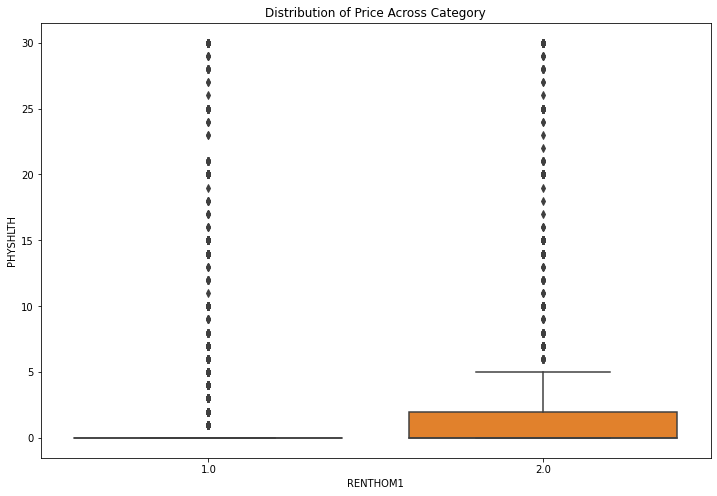

In [37]:
# TODO: write code to produce one or more plots that show the value of
# PHYSHLTH based on the value of RENTHOM1
import seaborn as sns
fig, ax = plt.subplots(figsize=(12, 8))
sns.boxplot(data=df_phrh, x='RENTHOM1', y='PHYSHLTH', ax=ax)

ax.set_title('Distribution of Price Across Category')
ax.set_xlabel('RENTHOM1')
ax.set_ylabel('PHYSHLTH');

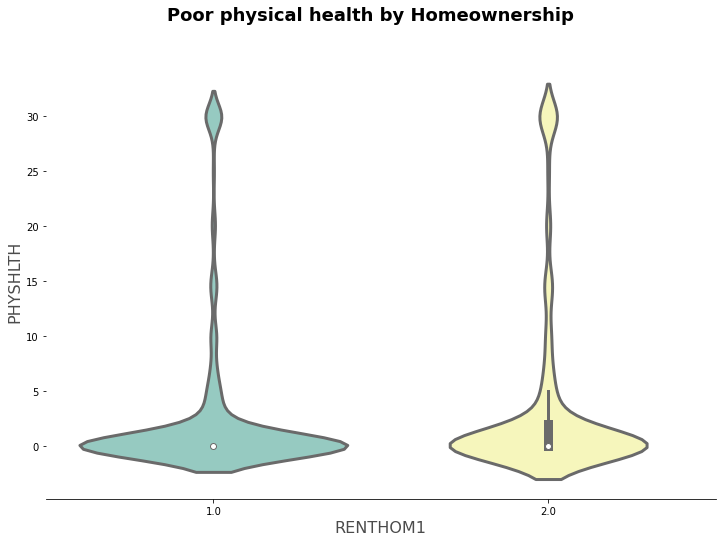

In [38]:
#Violin plots that show the value of
# PHYSHLTH based on the value of RENTHOM1
fig, ax = plt.subplots(figsize=(12, 8))
sns.violinplot(data=df_phrh, x='RENTHOM1', y='PHYSHLTH', inner="box", palette="Set3", cut=2, linewidth=3);
sns.despine(left=True)
fig.suptitle('Poor physical health by Homeownership', fontsize=18, fontweight='bold')
ax.set_xlabel("RENTHOM1",size = 16,alpha=0.7)
ax.set_ylabel("PHYSHLTH",size = 16,alpha=0.7);

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


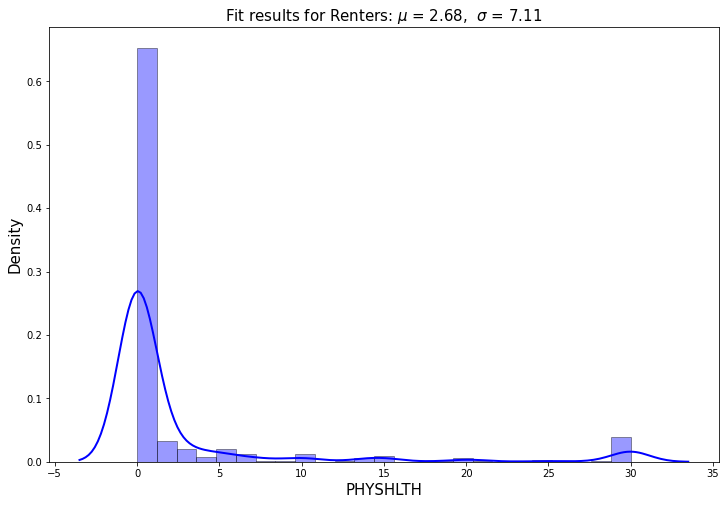

In [39]:
# Visualising the distribution of PHYSHLTH variable
# for RENTHOM1 = 1
from scipy.stats import norm
mu, std = norm.fit(df_rent['PHYSHLTH'])
plt.figure(figsize = [12, 8])
sns.distplot(df_rent['PHYSHLTH'], hist=True, kde=True, 
             bins=25, color = 'b', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 2});
plt.title("Fit results for Renters: $\mu$ = %.2f,  $\sigma$ = %.2f" % (mu, std), size=15)
plt.xlabel("PHYSHLTH", size=15);
plt.ylabel("Density", size=15);

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


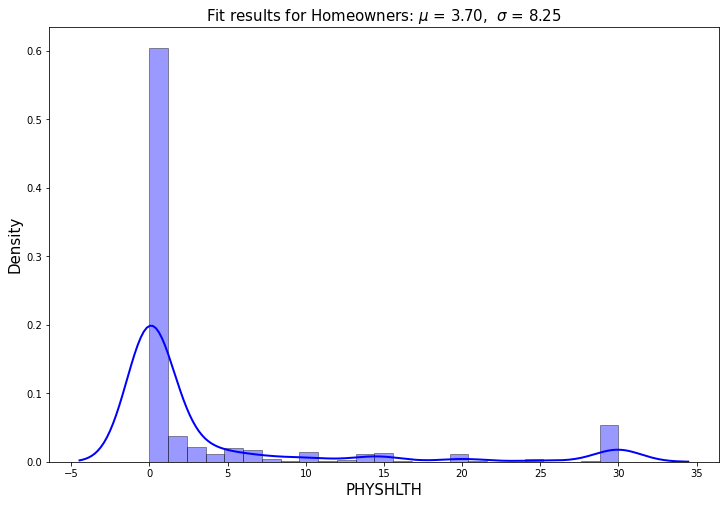

In [40]:
# Visualising the distribution of PHYSHLTH variable
# for RENTHOM1 = 2
from scipy.stats import norm
mu, std = norm.fit(df_own['PHYSHLTH'])
plt.figure(figsize = [12, 8])
sns.distplot(df_own['PHYSHLTH'], hist=True, kde=True, 
             bins=25, color = 'b', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 2});
plt.title("Fit results for Homeowners: $\mu$ = %.2f,  $\sigma$ = %.2f" % (mu, std), size=15)
plt.xlabel("PHYSHLTH", size=15)
plt.ylabel("Density", size=15);

In [41]:
df_phrh.groupby('RENTHOM1')['PHYSHLTH'].describe()

,count,mean,std,min,25%,50%,75%,max
RENTHOM1,,,,,,,,
1.0,8453.0,2.675855,7.108881,0.0,0.0,0.0,0.0,30.0
2.0,5206.0,3.695928,8.253077,0.0,0.0,0.0,2.0,30.0


###Interpretation
- Physical health boxplot for Renters has no whisker because; 
  - the lower quartile is equal to the minimum and the upper quartile is equal to the maximum which is zero
- Median number of days of poor physical health in thesame for both renters and homeowners
- 75th percentile for number of days of poor physical health is higher for homeowners than renters
- Homeowners have higher distribution for number of days of poor physical health.

### Is the Difference Statistically Significant?

- Null Hypothesis: There's no statiscally significant  difference  in PHYSHLTH based on  whether someone rents or owns their home
- Alternative Hypothesis: There's statiscally significant  difference  in PHYSHLTH based on  whether someone rents or owns their home
- Test Type: We will run a two-sample independent t-test.

In [42]:
# Convert 1 and 2 in RENTHOM1 column to Own and Rent respectively 
df_phrh["RENTHOM1"].replace({1: "Own", 2: "Rent"}, inplace=True)
df_phrh

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


,PHYSHLTH,RENTHOM1
0,0.0,Rent
1,14.0,Own
2,0.0,Rent
4,0.0,Rent
5,2.0,Rent
...,...,...
14763,0.0,Rent
14764,0.0,Rent
14765,0.0,Rent
14766,2.0,Rent


In [43]:
#independent t-test using researchpy
#!pip install researchpy
import researchpy as rp
rp.ttest(group1= df_phrh['PHYSHLTH'][df_phrh['RENTHOM1'] == 'Own'], group1_name= "Homeowner",
         group2= df_phrh['PHYSHLTH'][df_phrh['RENTHOM1'] == 'Rent'], group2_name= "Renter")

(    Variable        N      Mean        SD        SE  95% Conf.  Interval
 0  Homeowner   8453.0  2.675855  7.108881  0.077321   2.524287  2.827422
 1     Renter   5206.0  3.695928  8.253077  0.114384   3.471688  3.920168
 2   combined  13659.0  3.064646  7.581325  0.064869   2.937494  3.191798,
                    Independent t-test     results
 0  Difference (Homeowner - Renter) =      -1.0201
 1               Degrees of freedom =   13657.0000
 2                                t =      -7.6533
 3            Two side test p value =       0.0000
 4           Difference < 0 p value =       0.0000
 5           Difference > 0 p value =       1.0000
 6                        Cohen's d =      -0.1348
 7                        Hedge's g =      -0.1348
 8                    Glass's delta =      -0.1435
 9                      Pearson's r =       0.0653)

In [44]:
#independent t-test using scipy.stats
import scipy.stats as stats
stats.ttest_ind(df_phrh['PHYSHLTH'][df_phrh['RENTHOM1'] == 'Own'], 
                df_phrh['PHYSHLTH'][df_phrh['RENTHOM1'] == 'Rent'])

Ttest_indResult(statistic=-7.653280527933314, pvalue=2.0902050539473093e-14)

- Based on researchpy test, there is evidence to suggest that the average number of days of poor health for **Homeowner group** with Mean = 3.70  & 95% Confidence Interval: 3.47, 3.92 was higher than **Renter** group with Mean = 2.68 & 95% Confidence Interval: 2.52, 2.83
 - Hence, We can reject the null hypothesis: **There's no statiscally significant difference in PHYSHLTH based on whether someone rents or owns their home** 
- Also Based on the pvalue of the scipy test
 -  We can very confidently reject the null hypothesis since p-value is less than our alpha (α) of 0.05

## Next Steps

- Continuing within the sphere of Health, I would like to investigate Mental Health using the MENTHLTH variable in relationship to home ownership using the RENTHOM1 variable.
- The goal will be to see if being an homeowner or renter have significant effect on residents' mental health.
- The Null hypothesis will be such that there's no significant relationship between being a homeowner or renter and the state of residents' mental health
- The Alternative hypothesis will be such that there is indeed significant relationship.